# Las losowy regresyjny

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Parametry:

1. Te same, które mamy w drzewach:
- criterion{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”},, default=squared_error - kryterium optymalizacji drzewa
- splitter{“best”, “random”}, default=”best” - Sposób wyboru najlepszego podziału
- max_depth int, default=None - maksymalna głębokość drzewa
- min_samples_split int or float, default=2 - minimalna liczebność próby, aby dokonać kolejnego podziału
- min_samples_leaf int or float, default=1 - minimalna liczebność próby w liściu.
- min_weight_fraction_leaf float, default=0.0 - minimalny ważony udział z całości zbioru. Jeżeli nie ma wagi, to każdy rekord jest traktowany tak samo.
- max_features int, float or {“sqrt”, “log2”}, default=None - liczba zmiennych rozważana przy każdym podziale.
- max_leaf_nodes int, default=None - maksymalna liczba liści
- min_impurity_decrease float, default=0.0 - podział zostanie stworzony, jeżeli wartość criterion zmniejszy się o co najmniej podaną wartość.
- random_state - ziarno losowania.
- class_weight dict, list of dict or “balanced”, default=None - wagi klas.
- ccp_alpha non-negative float, default=0.0 - parametr złożoności drzewa. dla 0 nie ma przycięć. Im wyższa wartość tym mniej złożone drzewo.
- monotonic_cst array-like of int of shape (n_features), default=None - ustalenie zależności monotonicznej zmiennych.

2. Nowe parametry:
- n_estimators int, default=100 - liczba drzew w modelu.
- bootstrap bool, default=True - czy ma zostać użyta metoda pootstrap do tworzenia drzew. Jeżeli nie, za każdym razem będzie użyty cały zbiór.
- max_samples int or float, default=None - wielkość próbki bootstrap do wyznaczenia jednego drzewa.
- oob_score bool or callable, default=False - Używalne tylko, gdy bootstrap = True, użycie out-of-bag próbek do wyznaczenia oceny.
- n_jobs int, default=None - Liczba równoległych procesów przy trenowaniu. None oznacza 1, a -1 maksymalna liczba.
- verbose int, default=0 - kontrola szczegółowości outputów w trakcie estymacji.
- warm_start bool, default=False - dla True przy ponownym fitowaniu, użyje wcześniejszych iteracji, czyli nie będzie tworzyć nowego modelu od początku.


Zbiór danych https://www.kaggle.com/datasets/kukuroo3/flight-price-predict-competition-format

Cel: Przewidzenie ceny biletu lotniczego. Może być przydatny w kilku sytuacjach. Na przykład stworzenie aplikacji, gdzie użytkownicy będą sprawdzać jaka powinna być cena biletu lub kiedy kupić, aby cena była najkorzystniejsza. Może być tez użyta przez linie lotnicze do ustalania cen na podstawie rekomendacji modelu lub prawdopodobnych cen konkurencji.

In [1]:
from  sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Przeniesienie do głównego folderu z "2_machine_learning"
os.chdir('../')

In [3]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [4]:
# Załadowanie danych
train_x = pd.read_csv('data/flights_prices/X_train.csv')
train_y = pd.read_csv('data/flights_prices/y_train.csv')
test_x = pd.read_csv('data/flights_prices/X_test.csv')
test_y = pd.read_csv('data/flights_prices/y_test.csv')

In [4]:
# nagłówek
train_x.head()


,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32


In [6]:
# Złączenie zbioru do data preprocessingu
train = train_x.merge(train_y, on = 'filghtId')
test = test_x.merge(test_y, on = 'filghtId')
print(train.shape)
print(test.shape)

(5698, 11)
(3347, 11)


In [9]:
# Sprawdzenie czy oba zbiory mają te same kolumny
min(train.columns  == test.columns)

np.True_

In [10]:
# stworzenie wejsciowego dfa
df  = pd.concat([train, test])

In [11]:
# describe
df.describe()

,filghtId,duration,days_left,price
count,9045.000000,9045.000000,9045.000000,9045.000000
mean,252355.523162,13.673428,25.814925,52198.478165
std,29467.328614,6.839508,13.514093,13179.175493
min,7837.000000,1.250000,1.000000,2339.000000
25%,229370.000000,8.750000,14.000000,44610.000000
50%,252789.000000,13.000000,26.000000,53164.000000
75%,276398.000000,17.670000,37.000000,60365.000000
max,300152.000000,45.830000,49.000000,117307.000000


In [12]:
# nagłówek
df.head()

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521


In [13]:
# kolumny kategoryczne
cols = df.select_dtypes(include='object').columns

In [14]:
# value counts
for i in cols:
    print(df[i].value_counts())

airline
Vistara      5831
Air_India    3195
Indigo          6
GO_FIRST        5
SpiceJet        4
AirAsia         4
Name: count, dtype: int64
flight
UK-772     143
UK-836     129
UK-706     122
UK-874     121
UK-860     114
          ... 
6E-369       1
G8-171       1
SG-3027      1
6E-5038      1
I5-1531      1
Name: count, Length: 296, dtype: int64
source_city
Mumbai       1904
Delhi        1804
Bangalore    1665
Kolkata      1248
Hyderabad    1226
Chennai      1198
Name: count, dtype: int64
departure_time
Morning          2241
Evening          2022
Early_Morning    1943
Night            1656
Afternoon        1179
Late_Night          4
Name: count, dtype: int64
stops
one            8177
zero            771
two_or_more      97
Name: count, dtype: int64
arrival_time
Night            2813
Evening          2477
Morning          2087
Afternoon        1100
Early_Morning     370
Late_Night        198
Name: count, dtype: int64
destination_city
Mumbai       1837
Delhi        1609
Bangalore   

Wnioski:

1. airline - ma 2 główne wartości. Stworzymy zmienną is_vistara.
2. flight - zbyt dużo różnych wartości.
3. source_city - należy przekodować.
4. departure_time - należy przekodować oraz złączyć kategorie "Night" oraz "Late_Night" 
5. stops - stworzymy jedną zmienną "is_zero_stops"
6. arrival_time - należy przekodować.
7. destination_city - należy przekodować.

In [15]:
# 1
df['is_vistara'] = (df['airline']=='Vistara').astype(int)


In [16]:
# 4 - złączenie dwóch kategorii
df.loc[df['departure_time']=='Late_Night','departure_time'] = 'Night'
df['departure_time'].value_counts()

departure_time
Morning          2241
Evening          2022
Early_Morning    1943
Night            1660
Afternoon        1179
Name: count, dtype: int64

In [17]:
# 5
df['is_zero_stops'] = (df['stops']=='zero').astype(int)
df.is_zero_stops.value_counts()

is_zero_stops
0    8274
1     771
Name: count, dtype: int64

## Enkodowanie zmiennych

Zmienne można enkodować z kategorycznych na liczbowe na wiele sposób. Będziemy je poznawać głównie w części poświęconej zaawansowanym zagadnieniom Machine Learning. 

Jedną z podstawowych form enkodowania jest <b> one hot encoding </b>, który polega na stworzeniu osobnej zmiennej dla każdej kategorii. Na przykład enkodując zmienną departure_time uzyskamy 5 zmiennych:
1. departure_time_Morning
2. departure_time_Evening
3. departure_time_Early_Morning
4. departure_time_Night
5. departure_time_Afternoon

Dla danego wiersza, tylko jedna zmienna będzie równa 1 (ta, która odpowiada wartości zmiennej kateorycznej)

<b> WAŻNE </b> 

W praktyce jedną zmienną się usuwa, ponieważ będzie ona miała wartość 1, kiedy pozostałe będą równe 0. Gdybyśmy jednej zmiennej nie usunęli, mielibyśmy współliniowość.


In [19]:
# one hot encoding
df = pd.get_dummies(data=df, columns = ['departure_time','source_city','arrival_time','destination_city'], drop_first=True, dtype=int)

In [20]:
df.head()

,filghtId,airline,flight,stops,duration,days_left,price,is_vistara,is_zero_stops,departure_time_Early_Morning,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,252589,Vistara,UK-808,one,13.25,46,69244,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,223754,Vistara,UK-927,one,10.42,31,52392,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,243398,Vistara,UK-988,one,13.00,28,61933,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,208360,Vistara,UK-815,one,12.67,17,53164,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,247226,Vistara,UK-854,one,13.67,32,42521,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [28]:
x_names  =list(df.select_dtypes(exclude='object').columns[1:])
x_names

['duration',
 'days_left',
 'price',
 'is_vistara',
 'is_zero_stops',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Morning',
 'departure_time_Night',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai']

In [30]:
del x_names[x_names.index('price')]

In [31]:
train_x_new = df.merge(train_x['filghtId'], on = 'filghtId')[x_names]
test_x_new = df.merge(test_x['filghtId'], on = 'filghtId')[x_names]

In [32]:
# Model
model = RandomForestRegressor(max_depth=15, n_estimators=150, min_samples_leaf=10, min_samples_split=20, oob_score=True).fit(train_x_new, train_y['price'])

In [33]:
# wyciągnięcie jednego drzewa
model.estimators_[2]

DecisionTreeRegressor(max_depth=15, max_features=1.0, min_samples_leaf=10,
                      min_samples_split=20, random_state=456148060)

In [34]:
# Ważność zmiennych
model.feature_importances_

array([5.60758372e-01, 6.78571397e-02, 1.02859034e-01, 8.49987756e-05,
       5.78848235e-03, 5.79583211e-03, 5.95997535e-03, 4.31678639e-03,
       5.17753487e-03, 4.09113665e-02, 1.60736208e-02, 1.92819338e-02,
       2.47997191e-02, 4.94523680e-03, 1.34047927e-02, 1.36662299e-03,
       4.73207436e-03, 1.09104473e-02, 7.34962679e-03, 3.25727678e-02,
       2.01535889e-02, 2.22424157e-02, 2.26576311e-02])

In [35]:
# OOB score
model.oob_score_

0.6576968969718859

In [36]:
# R2 train
model.score(train_x_new,train_y['price'])

0.7329138084553901

In [37]:
# R2 test
model.score(test_x_new, test_y['price'])


0.678062026206288

In [38]:
# Predykcja na całym zbiorze
total_pred = model.predict(df[x_names])

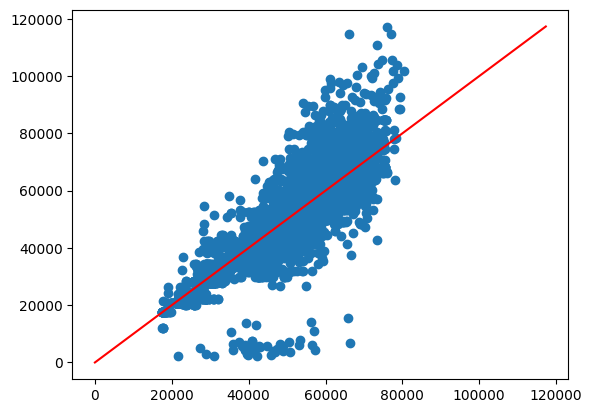

In [39]:
# Wykres rozrzutu
plt.scatter(total_pred,df['price'])
plt.plot(np.arange(0,df['price'].max()+10),np.arange(0,df['price'].max()+10),color='red')
plt.show()

Model jest stabilny, metryka R2 jest na przeciętnym poziomie, należałoby dokonać analizy innych metryk błędu i zdecydować czy model spełnia założenia. Na tym etapie można też pomyśleć o optymalizacji parametrów modelu, co sprawdzimy dla modelu klasyfikacyjnego.